# EDA Project on Retail Dataset

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
df= pd.read_csv('retail_sales_dataset.csv')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


## EDA of Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


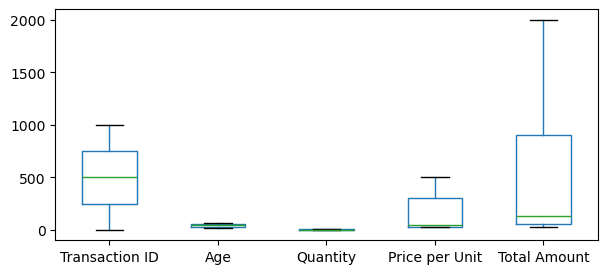

In [4]:
#Check for Outliers

df.boxplot(grid= False, figsize=(7,3))
plt.show()

In [5]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [6]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [7]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [8]:
df['Quantity'].unique()

array([3, 2, 1, 4], dtype=int64)

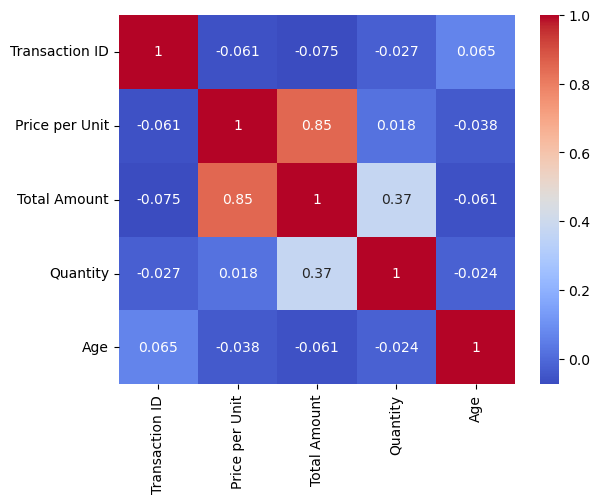

In [30]:
correlation=df[['Transaction ID','Price per Unit','Total Amount','Quantity','Age']].corr()

sns.heatmap(correlation,cmap='coolwarm', annot=True)
plt.show()

### Descriptive Statistics

In [9]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [10]:
from numpy import median
df1= df.select_dtypes(include= 'number')

In [11]:
# Median

Median=df1.median()
Median

Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

## Time Series Analysis

In [12]:
df['Date']=pd.to_datetime(df['Date'])
df.sort_values(by=['Date'],inplace= True,ignore_index= True)
df.set_index('Date', inplace= True)

### Revenue Trend

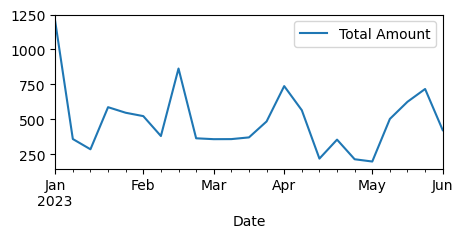

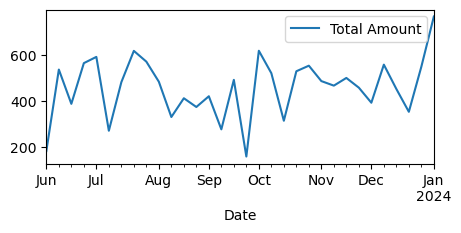

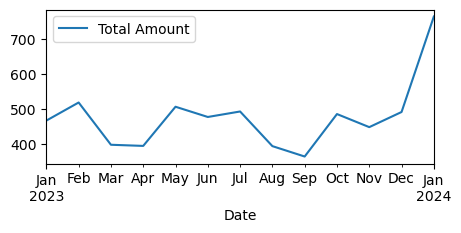

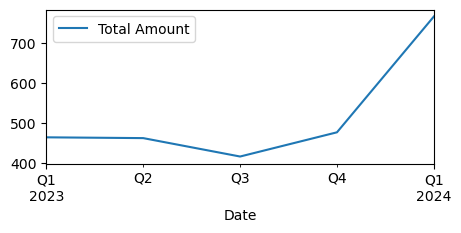

In [13]:
first_half= df.loc['2023-01-01':'2023-06-01',['Total Amount']].resample("W").mean()
first_half.plot(figsize=(5,2))

Second_half= df.loc['2023-06-01':'2024-01-01',['Total Amount']].resample("W").mean()
Second_half.plot(figsize=(5,2))

Monthly= df.loc['2023-01-01':'2024-01-01',['Total Amount']].resample("ME").mean()
Monthly.plot(figsize=(5,2))

Quarterly= df.loc[:,['Total Amount']].resample("QE").mean()
Quarterly.plot(figsize=(5,2))

plt.show()

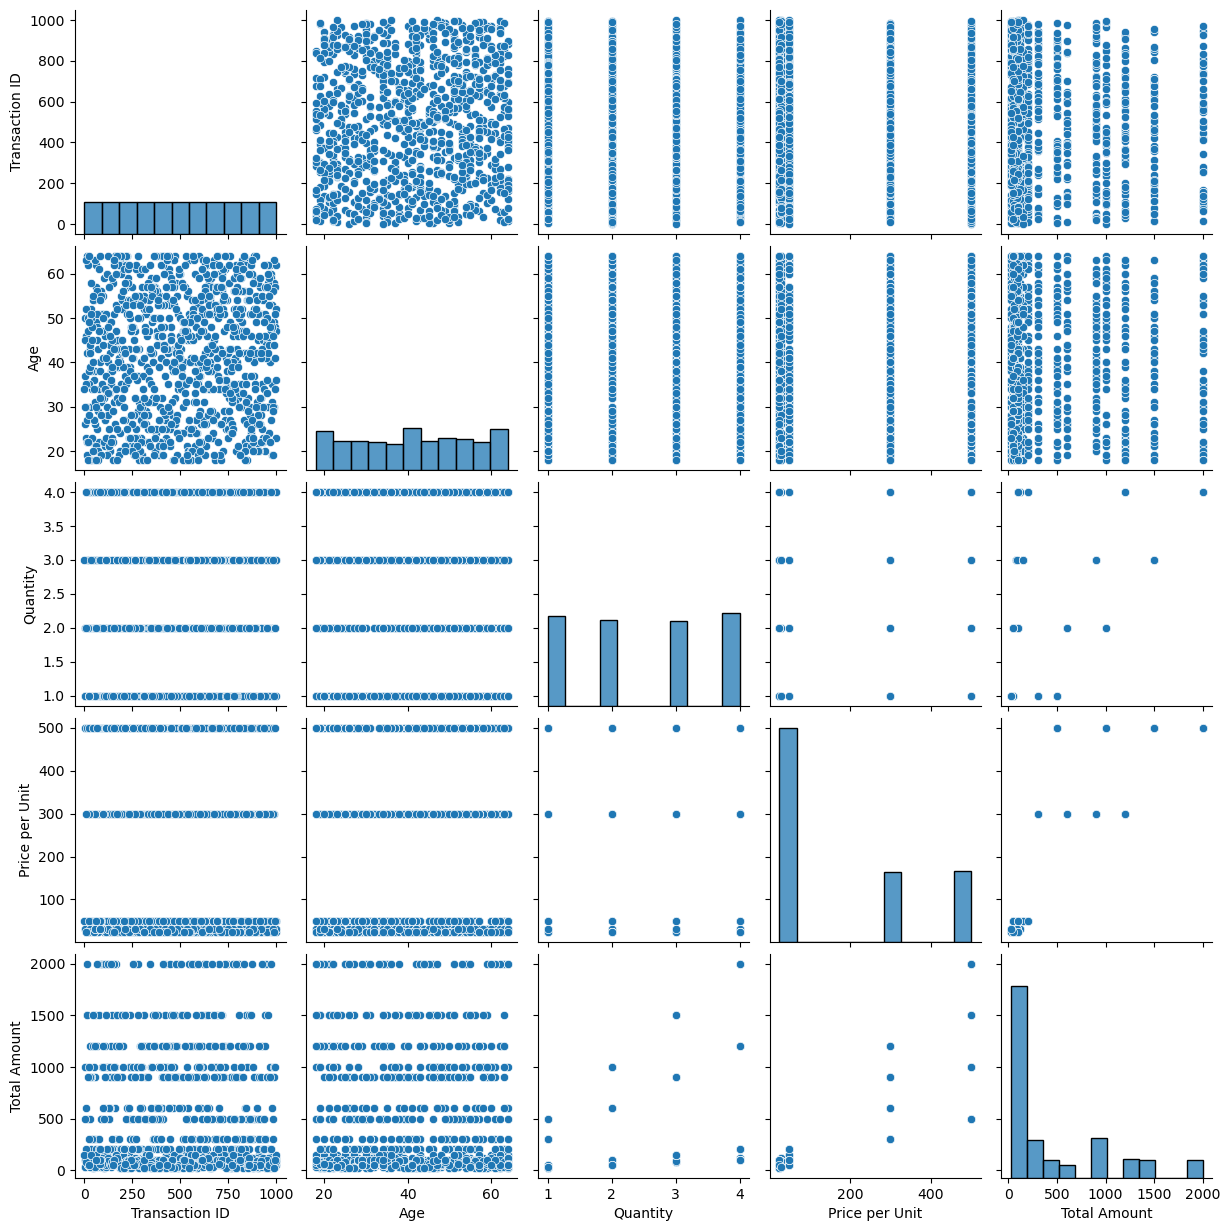

In [14]:
sns.pairplot(df)
plt.show()

### Top 5 Peak Sales Months

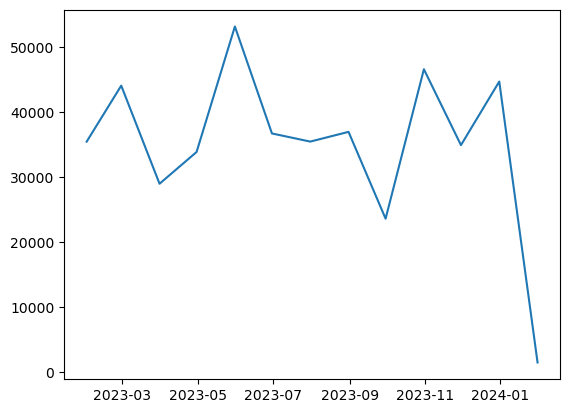

,Total Amount
Date,
2023-05-31,53150
2023-10-31,46580
2023-12-31,44690
2023-02-28,44060
2023-08-31,36960


In [15]:
peak_sale= df.loc['2023-01-01':'2024-01-01',['Total Amount']].resample("ME").sum()

plt.plot(peak_sale)
plt.show()

peak_sale.sort_values(by= 'Total Amount',ascending= False).head()

## Customer and Product Analysis

### Key Customers

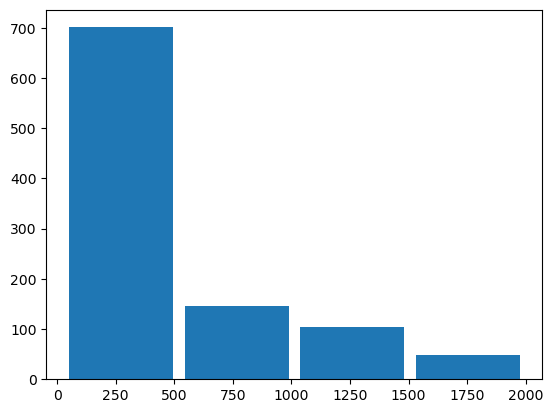

In [16]:
plt.hist(df['Total Amount'],bins=4, rwidth= 0.9)
plt.show()

### Customer based on Gender

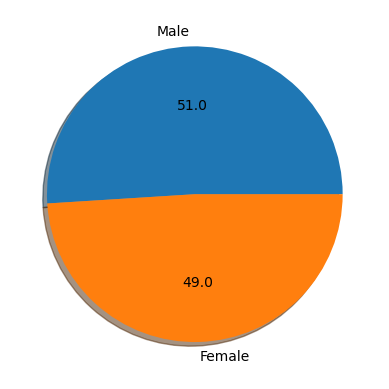

In [17]:
Based_on_Gender= df.Gender.value_counts()
y= ['Male','Female']
plt.pie(Based_on_Gender,
        labels=y, 
        autopct= '%.1f',
        shadow= True)

plt.show()

### Customer per Category

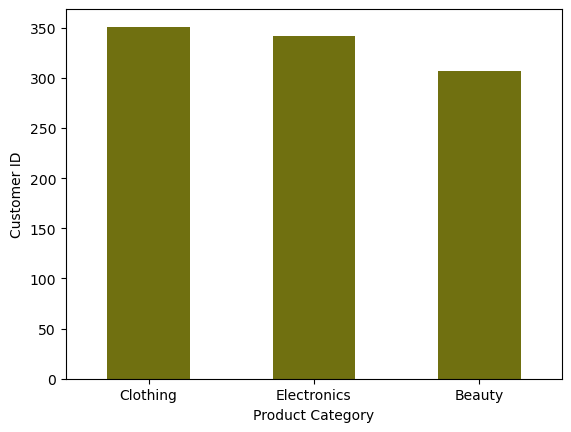

In [18]:
Category_by_customers= df.groupby('Product Category')['Customer ID'].count().sort_values(ascending= False)
Category_by_customers

sns.barplot(Category_by_customers,color= 'Olive',width= 0.5)
plt.show()

### Top Category by Quantity Sold

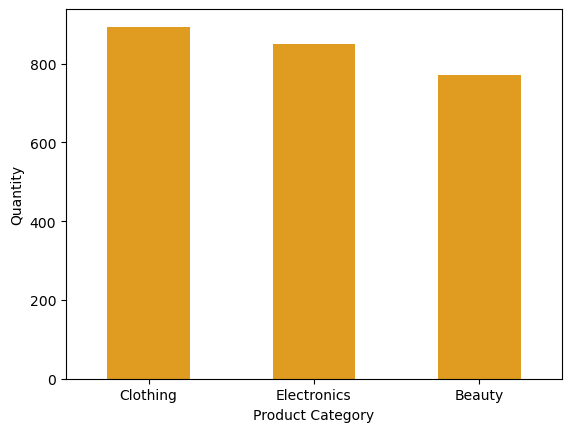

In [19]:
Category_based_on_Quantity=df.groupby('Product Category')['Quantity'].sum().sort_values(ascending= False)
sns.barplot(Category_based_on_Quantity, color= 'Orange',width= 0.5)
plt.show()

### Top Revenue generating Category

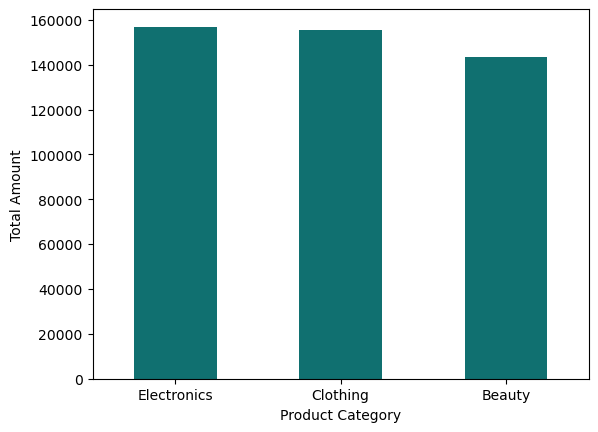

In [20]:
Category_based_on_Revenue=df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending= False)
sns.barplot(Category_based_on_Revenue,color='teal', width= 0.5)
plt.show()

In [21]:
Sale_summary=df.groupby('Product Category')[['Quantity','Total Amount']].sum()
Sale_summary

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


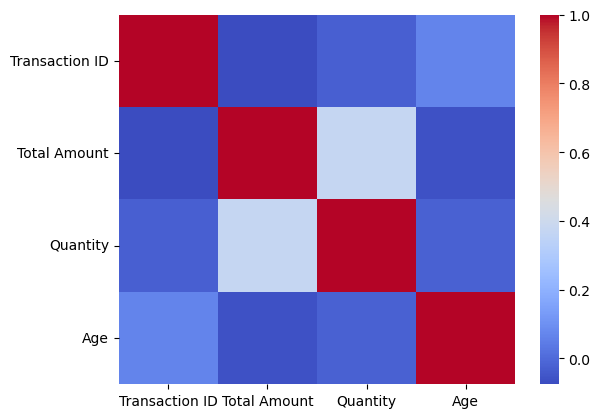

In [27]:
aa=df[['Transaction ID','Total Amount','Quantity','Age']].corr()

sns.heatmap(aa,cmap='coolwarm')
plt.show()